# Neuroscience 301
# Python Crash Course
## Part 2 - Intro to NumPy
### Content
[Section 1 - Import Statements](#Section1)<br/>
[Section 2 - What is an array?](#Section2)<br/>
[Section 3 - Math with Arrays](#Section3)<br/>
[Section 4 - Why do we care?](#Section4)<br/><br/><br/>
Welcome back! This notebook picks up where we last left off and will assume that you have a good grasp on everything from the last notebook. If you get confused about something, feel free to go back and look at the first notebook or reach out if you still can't figure it out.<br/><br/>
This tutorial covers the basics of using the <code>numpy</code> python module. <code>numpy</code> provides us with a bunch of new functions and data types that we can use to extend pythons functionality. In particular, <code>numpy</code> gives us the ability to work efficiently with numerical data, which will almost always be what you get from working in the lab. Let's get started!

<a id='Section1'></a>
### Section 1 - Import Statments and Using Modules
Before we can start learning how to use numpy, we must first import it like so

In [6]:
import numpy as np
import matplotlib.pyplot as plt  # You can ignore this import for now, we are just going to use it to make some visualizations,
                                 # but we will learn it in the next notebook

Whenever we want to import a module we must write an import statement like this. For common modules which we will use a lot, it is common to provide an "alias" for the module(<code>np</code>, <code>plt</code>) which we can use to more easily refer to them later.<br/>
For example, if I want to create a basic data structure in numpy called an array, I can do that like this

In [7]:
a = np.array([1, 2, 3, 4])
print(a)

[1 2 3 4]


<a id='Section2'></a>
### Section 2 - What is an array?

Arrays are the central data structure of numpy. They are similar to a python list but are capable of much much more. There is A LOT of mathematical functionality that arrays have access to that don't exist for the generic python list. Because of this every element within a numpy array *must be of the same type*. <br/>
One of these new functionalities is the idea of multiple **dimensions** . You can think about the dimensions of an array as the rows and columns of a matrix, *and* that is how they are indexed. Let me show you an example

In [8]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


By default, numpy will print out our arrays for us in this stacked list/matrix like form. Lets try indexing this array.

In [9]:
print(a[0])
print(a[1])

[1 2 3 4]
[5 6 7 8]


In numpy, our first index will always refer to the first dimension in our array, which in this case are the rows. So when we write a[0] we are referring to the zeroth row of our array and all of its columns. If you aren't sure what the shape or dimensionality is of your array you can always use print out its <code>shape</code> attribute like so

In [10]:
print(a.shape)

(3, 4)


From this we can see that our array has 3 rows and 4 columns.<br/>
We can also do slicing with numpy similarly to how we did with python lists, but it'll be slightly different because of the additional structure that arrays have.

In [11]:
print(a[1:])

[[ 5  6  7  8]
 [ 9 10 11 12]]


When we write a colon like this, it is telling numpy to retrieve all of the rows, starting at the first row (all but the zeroth)

What if we didn't want to retrieve a row, but instead wanted to retrieve all the values from a particular column?

In [12]:
col1 = a[:, 0]
print(col1)

[1 5 9]


The <code>[:, 0]</code> indexing is saying to get all the rows, but only the zeroth column. We denote which dimension we are indexing by the order and the comma

What is the above code doing? It is saying that I want to retrieve all of the rows (that's done with the colon ':'), but i only want to retrieve the zeroth entry in each row. You can also think about it as indexing into a list of lists type structure, and then retrieving the first entry in each inner list.<br/>
What if we wanted to retrieve one number from the array? Easy

In [13]:
val_of_interest = a[2, 3]
print(val_of_interest)

12


We can also still use the -1 indexing like in normal python lists.

In [14]:
print(a)
print(a[-1, -1])        # convince yourself why this line prints what it does

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
12


We don't always have to create numpy arrays by putting in all the values ourselves. Numpy comes with lots more ways to fill up arrays than built in python lists.

In [15]:
zero_arr = np.zeros(shape=7)     # Fills up an array with zeros
one_arr = np.ones(shape=10)      # Fills up an array with ones
rang_arr = np.arange(stop=5)     # Fills up an array from 0 to stop - 1
lin_arr = np.linspace(start=0, stop=25, num=26)      # Fills up an array with num evenly spaced numbers between start and stop
print(zero_arr)
print(one_arr)
print(rang_arr)
print(lin_arr)

[0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 1 2 3 4]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]


We aren't limited to one-dimensional arrays when calling these methods.

In [16]:
zero_arr = np.zeros(shape=(7, 7))
print(zero_arr)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


We can also change the values of arrays just like how we changed the values of lists.

In [17]:
zero_arr[3] = np.ones(7)
zero_arr[:, 3] = np.ones(7)
print(zero_arr)

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


And of course, we can use all the stuff we learned in the other notebook (for loops, if statements, functions) to help make this easier.

[[1. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1.]]


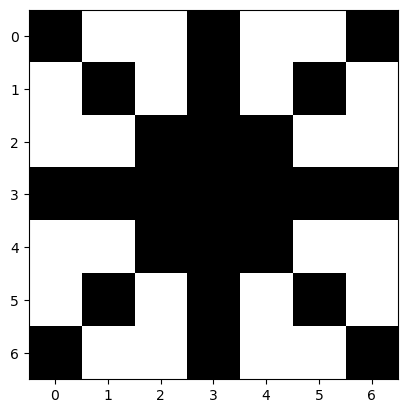

In [18]:
for i in range(7):
    zero_arr[i, i] = 1
    zero_arr[i, -i - 1] = 1
print(zero_arr)
plt.imshow(zero_arr, cmap='binary') # You can ignore these bottom two lines, this is just to show what we made visually.
plt.show()

Numpy allows us to use boolean indexing which is super nice! You can do that like this

In [19]:
arr = np.arange(11)
print(arr)
print(arr[arr % 2 == 0])                     # Get all elements that are divisible by 2
print(arr[arr >= 5])                         # Get all elements that are greater than or equal to 5
print(arr[(arr % 2 == 0) & (arr >= 5)])      # Get all elements that are divisible by 2, and, are greater than or equal to 5    

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  2  4  6  8 10]
[ 5  6  7  8  9 10]
[ 6  8 10]


Pretty cool<br/>
Numpy also allows us to extract numerical information about our arrays like the max, mean, etc.

In [20]:
arr = np.arange(101)
print(arr.max())    # Note that we need to use the parentheses after these but didn't when we called arr.shape earlier
print(arr.min())    # this is because these are functions, whereas the shape is considered an attribute. Something to keep in mind!
print(arr.mean())
print(arr.std())

100
0
50.0
29.154759474226502


Something that's particularly nice, is that we can use these numerical functions to get values from an array **along a specific axis/dimension**

In [21]:
arr = np.arange(1, 49).reshape(2, 24)   # Here we make a list of numbers from 1 to 48 and then use numpys reshape function to turn it into 2 rows with 24 columns each
print(arr.shape)
print(arr)

# Now we can ask for either the average across the columns, or the average across the rows by specifying the axis!
print('\n')    # This just tells python to print a blank line
print('Average column value:', arr.mean(axis=0))
print('\n')
print('Average row value:', arr.mean(axis=1))

(2, 24)
[[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
 [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]]


Average column value: [13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.
 31. 32. 33. 34. 35. 36.]


Average row value: [12.5 36.5]


Double check to make sure the output we got makes sense.

<a id='Section3'></a>
### Section 3 - Math with Arrays

All the math operations we did in the last crash course have their analogs we can compute with arrays. We were not able to do this with basic python lists!

In [22]:
arr = np.array([1, 2, 3, 4, 5, 6])
print(arr + 1)
print(arr / 2)
print(arr * 8)

[2 3 4 5 6 7]
[0.5 1.  1.5 2.  2.5 3. ]
[ 8 16 24 32 40 48]


We can also add together two arrays, so long as they have the same shape.

In [23]:
arr2 = np.array([1, 1, 1, 0, 0, 0])
print(arr + arr2)

[2 3 4 4 5 6]


And if we are dealing with multi-dimensional arrays we can also do matrix multiplication using the @ symbol (this is unique to numpy)

In [24]:
arr1 = np.arange(8).reshape(2, 4)
arr2 = np.arange(8).reshape(4, 2)
print(arr1 @ arr2)

[[28 34]
 [76 98]]


Numpy also gives us the ability to compute lots of the canonical mathematical functions super easily.

1.0
1.0
54.598150033144236
3.0
[ 1.00000000e+00  7.07106781e-01  6.12323400e-17 -7.07106781e-01
 -1.00000000e+00 -7.07106781e-01 -1.83697020e-16  7.07106781e-01
  1.00000000e+00]


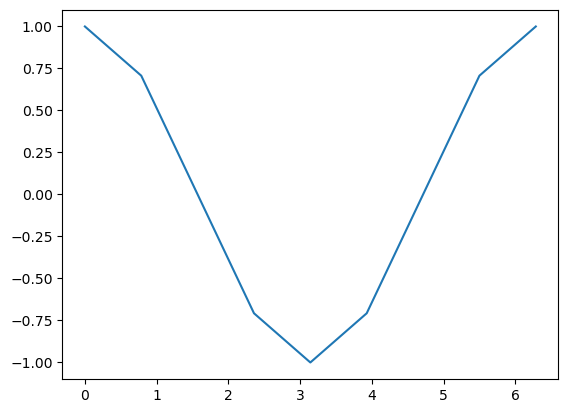

In [25]:
print(np.sin(np.pi / 2))
print(np.log(np.e))         # np.log is assumed to be the natural logarithm
print(np.exp(4))
print(np.sqrt(9))

# We can give arrays instead of numbers as well and numpy will compute it for each element in the array!
period = np.linspace(0, 2 * np.pi, 9)
print(np.cos(period))
plt.plot(period, np.cos(period))     # Again, just showing that it is actually computing cos(period), we are just taking very few samples from the cosine function
plt.show()                           # If we were to take more



**"Hey, I thought cos(pi/2) == 0,  why did we get 6.12323400e-17?"** <br/>
Computers have finite precision and can often fail when computing really small numbers. As you can tell the number is incredily small and is basically zero. In reality it *is* zero, but the computer for reasons that aren't important right now has a difficult time with this. If you see this just know that this is likely what is going on.

<a id='Section4'></a>
### Section 4 - Why do we care?
Numpy is deep. There is loads more functionality we could *talk* about, but I think for right now it is best to take a slight detour and talk about why we should care about numpy and the tools it gives us as neuroscientists.<br/><br/>
Let's say that you are taking collecting electrophysiological data from a cockroach as you stimulate one of the hairs on its leg. Let's say for some stimulus condition you collect 10 trials. Your data might look something like this

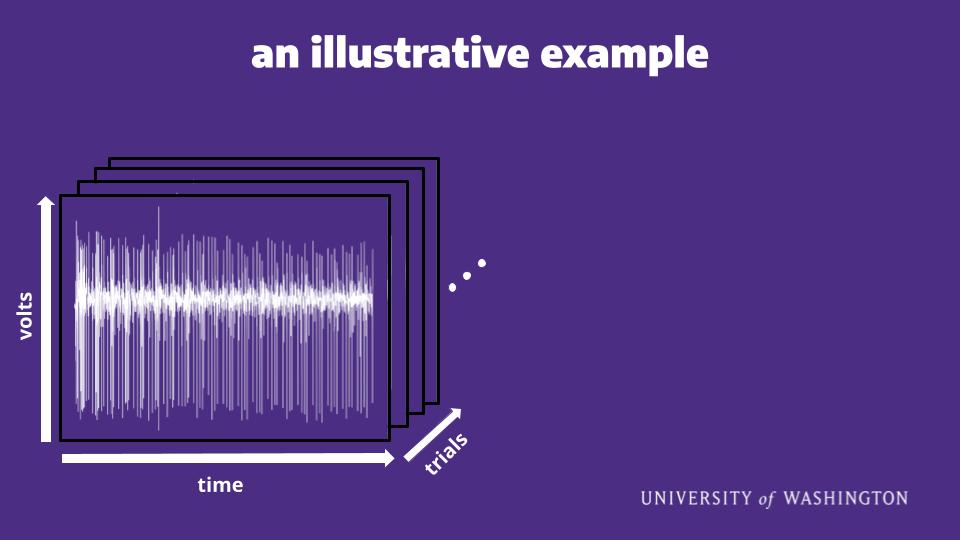

Now what if we want to extract some numerical data from these trials. Maybe something like, "what did the average response to *this* stimulus condition look like, across trials?"<br/>
How could we go about answering a question like that?<br/>
Well the first thing we need to do is just get our data into a form that we can represent numerically, and the best way to do that is with.....an array!

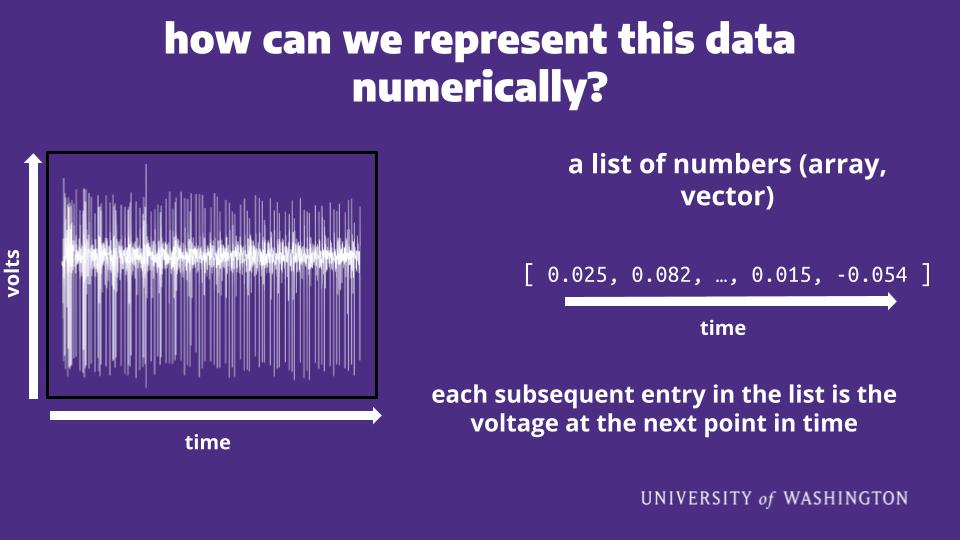

The above example is with only one trial, but what if we have 10 like before?<br/>
In that case, we can still just put all of our data into an array, we'll just need to add another dimension

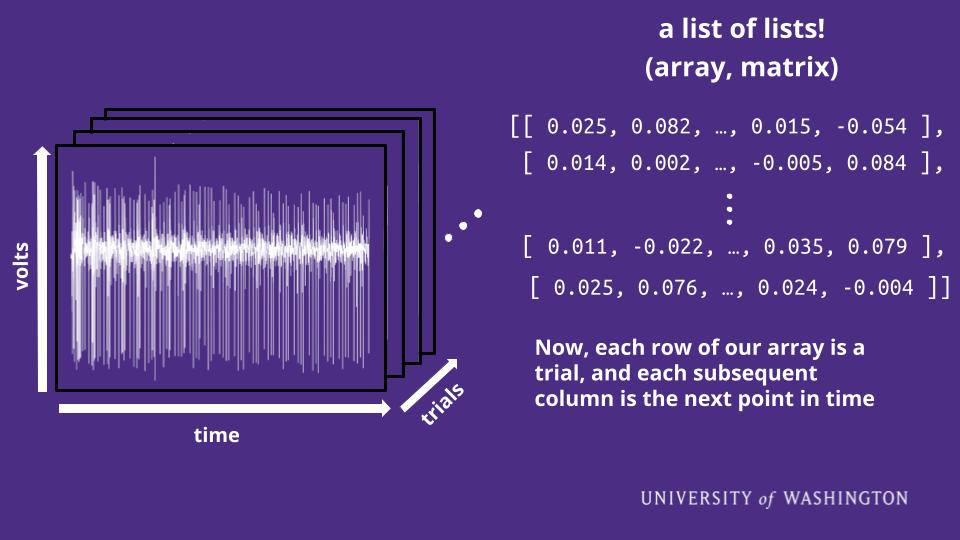

Lets load some data and walk through the process of finding out some information about it.

In [26]:
# LabChart can export data into a matlab file which we can load with the scipy library
import scipy.io
data = scipy.io.loadmat('ExampleData.mat')['data'][0]   # The details of this line are unimportant. For now, we are just trying to look at a typical workflow
print(data.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'ExampleData.mat'

Okay so LabChart gave us our data in the form of an array with 200k entries. Let's quickly plot it to see what we are looking at.

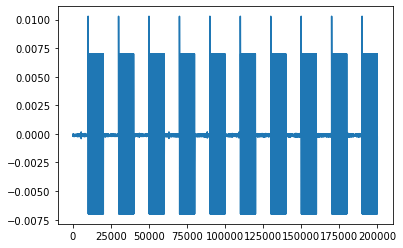

In [ ]:
plt.plot(data)
plt.show()

Huh, looks weird, let's only plot the first 20000 entries since it looks like that's where these weird cycles are happening.

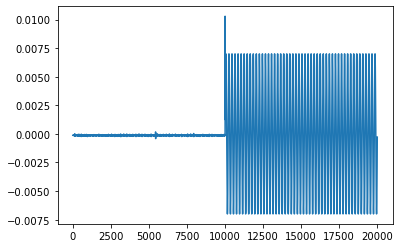

In [ ]:
plt.plot(data[:20000])
plt.show()

Ahhh okay, so the first 10000 entries is our data. It is one second of recording at 10000 samples/sec. The second half is our stimulation, what was on channel 2 in labchart. I don't really need that right now, so I am going to use numpy to split our data into a new row every 10000 entries.

In [ ]:
data = np.array_split(data, 20)
data = np.array(data)
print(data.shape)

(20, 10000)


Awesome! Now lets see what each row of our data looks like

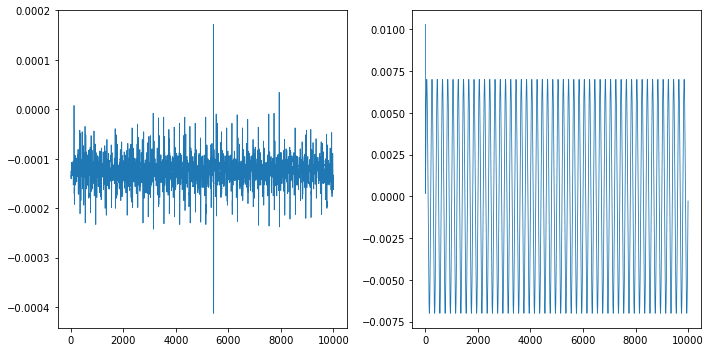

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))    # Again, you can ignore the plotting details for now
ax[0].plot(data[0], lw=0.8)              # Plotting the first row of our data
ax[1].plot(data[1], lw=0.8)              # Plotting the second row of our data
fig.tight_layout()
plt.show()

Sweet! For this experiment, our stimulus was a 50Hz sinewave, and we can clearly see that.<br/>
I am now going to further process our data to get our channels separated into their own arrays.

In [ ]:
ch1 = data[::2]          # This syntax tells numpy to retrieve every other row, starting at the 0th row
ch2 = data[1::2]         # This syntax tells numpy to retrieve every other row, starting at the 1st row
print(ch1.shape, ch2.shape)

(10, 10000) (10, 10000)


Fantastic! We now have two different arrays for each channel. I'm going to plot my first channel data to see what it looks like.

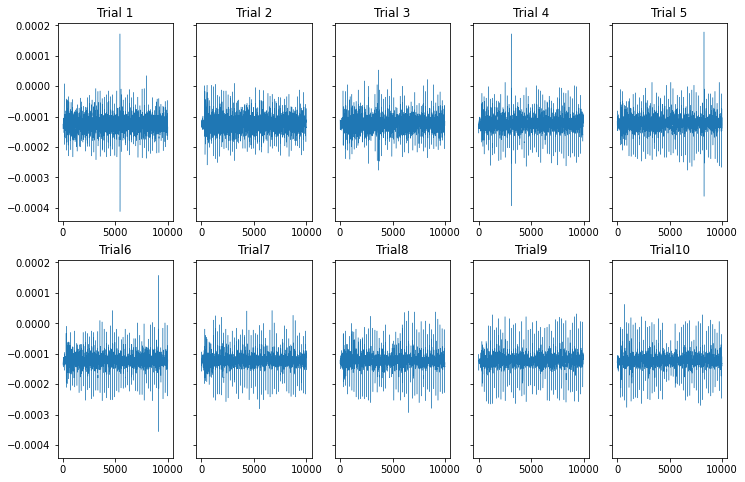

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(12, 8), sharey=True)
for i in range(5):
    ax[0, i].plot(ch1[i], lw=0.4)
    ax[0, i].set_title(f'Trial {i + 1}')
    ax[1, i].plot(ch1[i + 5], lw=0.4)
    ax[1, i].set_title(f'Trial{i + 6}')
plt.show()

Okay, so it looks like thereis a pattern, but there still was a lot of variation across trials. What would be nice is if I could average all of my trials together to see what the cells typically did in response to this sine wave.<br/>
Luckily, doing that with numpy is *super* simple, and in fact we already did it earlier in this notebook!

In [ ]:
avg_response = np.mean(ch1, axis=0)
print(avg_response.shape)

(10000,)


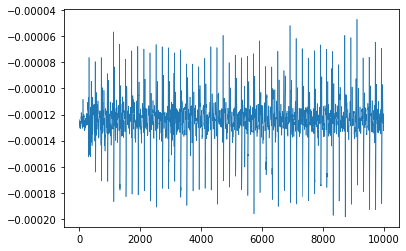

In [ ]:
plt.plot(avg_response, lw=0.6)
plt.show()

Okay cool, looks like a pattern is starting to emerge maybe in the spike timing.<br/>
I said before, that our stimulus here was a 50Hz sine wave. That means that 50 periods of stimulation occured in this 1 second recording. Since we sampled at 10000Hz, with some quick algebra you can see that one period is 200 entries in our array.<br/>
Lets split this average into periods and then take their average to see what a typical stimulation cycle looks like.

In [ ]:
stim_periods = avg_response.reshape(50, 200)
print(stim_periods.shape)       # Make sure everything happened correctly
avg_period = np.mean(stim_periods, axis=0)    # Average across every period of stimulation in our 1 second trial
print(avg_period.shape)

(50, 200)
(200,)


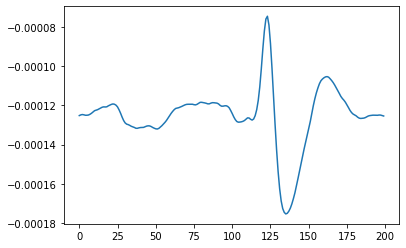

In [ ]:
plt.plot(avg_period)
plt.show()

Woah look at that! Looks like our spikes occur just after half of a period (pi radians) in our data! Cool! Now I have something to write about in my lab report! Lets also quickly look at the standard deviation.

In [ ]:
std_period = np.std(stim_periods, axis=0)
plt.plot(-avg_period)
plt.fill_between(np.arange(200), avg_period - std_period, avg_period + std_period, alpha=0.4)
plt.show()

NameError: name 'stim_periods' is not defined

Awesome! With some final tuning this could be a figure in a lab report, the only problem is that we need to change our units to seconds, and put labels, but this is a typical workflow!